# K-Nearest Neighbor Lab
Read over the sklearn info on [nearest neighbor learners](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)




In [207]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score


## 1 K-Nearest Neighbor (KNN) algorithm

### 1.1 (15%) Basic KNN Classification

Learn the [Glass data set](https://archive.ics.uci.edu/dataset/42/glass+identification) using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) with default parameters.
- Randomly split your data into train/test.  Anytime we don't tell you specifics (such as what percentage is train vs test) choose your own reasonable values
- Give typical train and test set accuracies after running with different random splits
- Print the output probabilities for a test set (predict_proba)
- Try it with different p values (Minkowskian exponent) and discuss any differences

In [ ]:
# Learn the glass data

# Read the glass data
df = pd.read_csv("glass.data", header=None)

X = df.iloc[:, :-1]  
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf.classes_)

yTrainPred = clf.predict(X_train)
trainAcc = accuracy_score(y_train, yTrainPred)
print(f"Training Accuracy: {trainAcc:.3f}")

yTestPred = clf.predict(X_test)
testAcc = accuracy_score(y_test, yTestPred)
print(f"Testing Accuracy: {testAcc:.3f}")

yTestProba = clf.predict_proba(X_test)
print(f"Output Probabilities for a test set: {yTestProba}")

p_values = [1, 2, 3, 4]
for p in p_values:
    clf = KNeighborsClassifier(n_neighbors=5, p=p)
    clf.fit(X_train, y_train)
    
    testAcc = accuracy_score(y_test, clf.predict(X_test))
    print(f"Test Accuracy for p={p}: {testAcc:.3f}")


[1 2 3 5 6 7]
Training Accuracy: 0.994
Testing Accuracy: 0.981
Output Probabilities for a test set: [[0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.2 0.8 0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.8 0.2 0.  0.  0. ]
 [0.  0.  0.  1.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.4 0.6 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.2 0.8 0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.4 0.6 0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0. 

#### Discussion
What were your accuracies or output probabilities and how did different hyperparameter values affect the outcome? Discuss the differences you see.

Training accuracy was very high, and very close to one, indicating that we fit the data well.

Testing accuracy was also very high, but not significantly lower that the training accuracy, indicating that we did not overfit the data, which I'm not 100% sure is even possible with knn.

All of the p values result in similar probabilities. If anything, p=1 results in a slightly higher probability on average, but nothing too crazy different. This indicates that maybe the test data doesn't really care too much about the distance of the points.

## 2 KNN Classification with normalization and distance weighting

Use the [magic telescope](https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff) dataset

### 2.1 (5%) - Without Normalization or Distance Weighting
- Do random 80/20 train/test splits each time
- Run with k=3 and *without* distance weighting and *without* normalization
- Show train and test set accuracy

In [164]:
# Learn magic telescope data

# Load the data
data, meta = arff.loadarff("telescope.arff")
df = pd.DataFrame(data)

# Separate features from targets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encode targets since g and h aren't numerical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

# Initialize the learner and fit it with the data
clf = KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X_train, y_train)
print(clf.classes_)

# Get the training accuracy
yTrainPred = clf.predict(X_train)
trainAcc = accuracy_score(y_train, yTrainPred)
print(f"Training Accuracy: {trainAcc:.3f}")

# Get the testing accuracy
yTestPred = clf.predict(X_test)
testAcc = accuracy_score(y_test, yTestPred)
print(f"Testing Accuracy: {testAcc:.3f}")

[0 1]
Training Accuracy: 0.886
Testing Accuracy: 0.795


#### Discussion
What did you observe in your results?

It took noticeably longer to fit the data since the data is so long. Also, both the training and testing accuracy was much lower than the glass dataset. I thought this was interesting since the glass dataset had less classes to categorize into and less data than the telescope dataset. It looks like this data doesn’t generalize well with k=3 and uniform weighting.

### 2.2 (10%) With Normalization
- Try it with k=3 without distance weighting but *with* normalization of input features.  You may use any reasonable normalization approach (e.g. standard min-max normalization between 0-1, z-transform, etc.)

In [171]:
# Train/Predict with normalization

# Load the data
data, meta = arff.loadarff("telescope.arff")
df = pd.DataFrame(data)

# Separate features from targets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Encode targets since g and h aren't numerical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2)

# Initialize the learner and fit it with the data
clf = KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X_train, y_train)
print(clf.classes_)

# Get the training accuracy
yTrainPred = clf.predict(X_train)
trainAcc = accuracy_score(y_train, yTrainPred)
print(f"Training Accuracy: {trainAcc:.3f}")

# Get the testing accuracy
yTestPred = clf.predict(X_test)
testAcc = accuracy_score(y_test, yTestPred)
print(f"Testing Accuracy: {testAcc:.3f}")

[0 1]
Training Accuracy: 0.901
Testing Accuracy: 0.829


#### Discussion
Discuss the results of using normalized data vs. unnormalized data

Normalizing the data seems to increase the accuracy of both the testing set and training set by about 3%. This is significant!!

### 2.3 (10%) With Distance Weighting
- Try it with k=3 and with distance weighting *and* normalization

In [185]:
#Train/Precdict with normalization and distance weighting

# Load the data
data, meta = arff.loadarff("telescope.arff")
df = pd.DataFrame(data)

# Separate features from targets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Encode targets since g and h aren't numerical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2)

# Initialize the learner and fit it with the data
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
clf.fit(X_train, y_train)
print(clf.classes_)

# Get the training accuracy
yTrainPred = clf.predict(X_train)
trainAcc = accuracy_score(y_train, yTrainPred)
print(f"Training Accuracy: {trainAcc:.3f}")

# Get the testing accuracy
yTestPred = clf.predict(X_test)
testAcc = accuracy_score(y_test, yTestPred)
print(f"Testing Accuracy: {testAcc:.3f}")

[0 1]
Training Accuracy: 1.000
Testing Accuracy: 0.833


#### Discussion
Comparison and discuss the differences you see with distance weighting and normalization vs without.

After normalizing the data and then applying weight by distance, the learner perfectly learns every dataset. This is scary since it seems that the learner is essentially memorizing the data, and is able to predict it perfectly. However, the testing set accuracy remained about the same, which might constitute overfitting.

### 2.4 (10%) Different k Values
- Using your normalized data with distance weighting, create one graph with classification accuracy on the test set on the y-axis and k values on the x-axis.
- Use values of k from 1 to 15.  Use the same train/test split for each. 

k=1, testAcc=0.79837
k=2, testAcc=0.79837
k=3, testAcc=0.82387
k=4, testAcc=0.82256
k=5, testAcc=0.82860
k=6, testAcc=0.82545
k=7, testAcc=0.83491
k=8, testAcc=0.83386
k=9, testAcc=0.83754
k=10, testAcc=0.83754
k=11, testAcc=0.83964
k=12, testAcc=0.83807
k=13, testAcc=0.83517
k=14, testAcc=0.83754
k=15, testAcc=0.83728


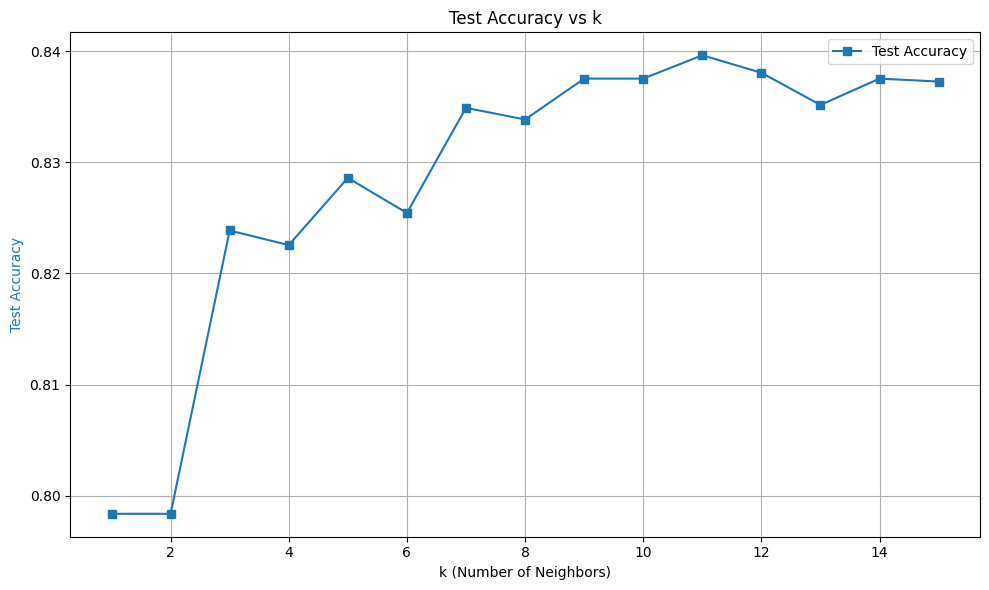

In [ ]:
# Calculate and Graph classification accuracy vs k values

# Load the data
data, meta = arff.loadarff("telescope.arff")
df = pd.DataFrame(data)

# Separate features from targets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Encode targets since g and h aren't numerical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2)

# Create a list to store the graphable point (k, testAcc)
points = []

for i in range(1,16):
    # Initialize the learner and fit it with the data
    clf = KNeighborsClassifier(n_neighbors=i, weights='distance')
    clf.fit(X_train, y_train)

    # Get the training accuracy
    yTrainPred = clf.predict(X_train)
    trainAcc = accuracy_score(y_train, yTrainPred)

    # Get the testing accuracy
    yTestPred = clf.predict(X_test)
    testAcc = accuracy_score(y_test, yTestPred)

    points.append((i, testAcc))

k_values = []
test_Acc = []

for point in points:
    k, acc = point
    k_values.append(k)
    test_Acc.append(acc)
    print(f"k={k}, testAcc={acc:.5f}")



# Graph Acc
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_Acc, color='tab:blue', label='Test Accuracy', marker='s')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Test Accuracy', color='tab:blue')
plt.title('Test Accuracy vs k')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### Discussion
How do the k values affect your results?

Very generally, higher k values increase accuracy. However, it seems that with even higher k values, the test set accuracy seems to regress. It seems like there is a sweet spot, but occasionally the most accurate k value will be pretty random.

## 3 KNN Regression with normalization and distance weighting

Use the [sklean KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) on the [housing price prediction](https://axon.cs.byu.edu/data/uci_regression/housing.arff) problem.  
### 3.1 (5%) Ethical Data
Note this data set has an example of an inappropriate input feature which we discussed.  State which feature is inappropriate and discuss why.

#### Discussion
Discuss the innapropriate feature. Which one and why?

The B feature is entirely inappropriate. It is inappropriate because the quality of a home is absolutely not determined by the proportion of blacks in the area. If we fit this data, we could enforce historical bias into our model. The other features like location, proximity to the river, air quality, and crime rates are much more important.

### 3.2 (15%) - KNN Regression 
- Do random 80/20 train/test splits each time
- Run with k=3
- Print the score (coefficient of determination) and Mean Absolute Error (MAE) for the train and test set for the cases of
  - No input normalization and no distance weighting
  - Normalization and no distance weighting
  - Normalization and distance weighting
- Normalize inputs features where needed but do not normalize the output

In [275]:
# Load the data
data, meta = arff.loadarff("housing.arff")
df = pd.DataFrame(data)

# Drop the inappropriate feature
df.drop("B", axis=1)

# Separate features from targets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 1. No input normalization and no distance weighting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = KNeighborsRegressor(n_neighbors=3, weights='uniform')
clf.fit(X_train, y_train)

yTrainPred = clf.predict(X_train)
trainR2 = r2_score(y_train, yTrainPred)
trainMAE = mean_absolute_error(y_train, yTrainPred)

yTestPred = clf.predict(X_test)
testR2 = r2_score(y_test, yTestPred)
testMAE = mean_absolute_error(y_test, yTestPred)

print("No Input Normalization and No Distance Weighting:")
print(f"Training R2: {trainR2:.3f}, Training MAE: {trainMAE:.3f}")
print(f"Testing R2: {testR2:.3f}, Testing MAE: {testMAE:.3f}\n")

# 2. Normalization and no distance weighting
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)
clf = KNeighborsRegressor(n_neighbors=3, weights='uniform')
clf.fit(X_train, y_train)

yTrainPred = clf.predict(X_train)
trainR2 = r2_score(y_train, yTrainPred)
trainMAE = mean_absolute_error(y_train, yTrainPred)

yTestPred = clf.predict(X_test)
testR2 = r2_score(y_test, yTestPred)
testMAE = mean_absolute_error(y_test, yTestPred)

print("Normalization and No Distance Weighting:")
print(f"Training R2: {trainR2:.3f}, Training MAE: {trainMAE:.3f}")
print(f"Testing R2: {testR2:.3f}, Testing MAE: {testMAE:.3f}\n")

# 3. Normalization and distance weighting
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)
clf = KNeighborsRegressor(n_neighbors=3, weights='distance')
clf.fit(X_train, y_train)

yTrainPred = clf.predict(X_train)
trainR2 = r2_score(y_train, yTrainPred)
trainMAE = mean_absolute_error(y_train, yTrainPred)

yTestPred = clf.predict(X_test)
testR2 = r2_score(y_test, yTestPred)
testMAE = mean_absolute_error(y_test, yTestPred)

print("Normalization and Distance Weighting:")
print(f"Training R2: {trainR2:.3f}, Training MAE: {trainMAE:.3f}")
print(f"Testing R2: {testR2:.3f}, Testing MAE: {testMAE:.3f}")


No Input Normalization and No Distance Weighting:
Training R2: 0.769, Training MAE: 3.176
Testing R2: 0.331, Testing MAE: 4.032

Normalization and No Distance Weighting:
Training R2: 0.869, Training MAE: 2.082
Testing R2: 0.797, Testing MAE: 2.693

Normalization and Distance Weighting:
Training R2: 1.000, Training MAE: 0.000
Testing R2: 0.729, Testing MAE: 3.171


#### Discussion
Discuss your results. How did the hyperparameters affect your results? Discuss each one and combinations of each.

As we normalize the data, and weight the features by distance, we get higher accuracy and lower error values. No normalization and No weighting is very low accuracy. Normalization and No Distance weighting is better, but as we can see, even with the memorized data after normalization AND distance weighting, we have higher test set accuracy and lower error values of both varieties.

### 3.3 (10%)  Different k Values
- Using housing with normalized data and distance weighting, create one graph with MAE on the test set on the y-axis and k values on the x-axis
- Use values of k from 1 to 15.  Use the same train/test split for each. 

k=1, testMAE=3.03137
k=2, testMAE=3.04586
k=3, testMAE=3.16779
k=4, testMAE=3.05191
k=5, testMAE=3.14583
k=6, testMAE=3.27010
k=7, testMAE=3.39068
k=8, testMAE=3.36893
k=9, testMAE=3.41754
k=10, testMAE=3.52808
k=11, testMAE=3.52370
k=12, testMAE=3.54656
k=13, testMAE=3.55106
k=14, testMAE=3.56381
k=15, testMAE=3.58172


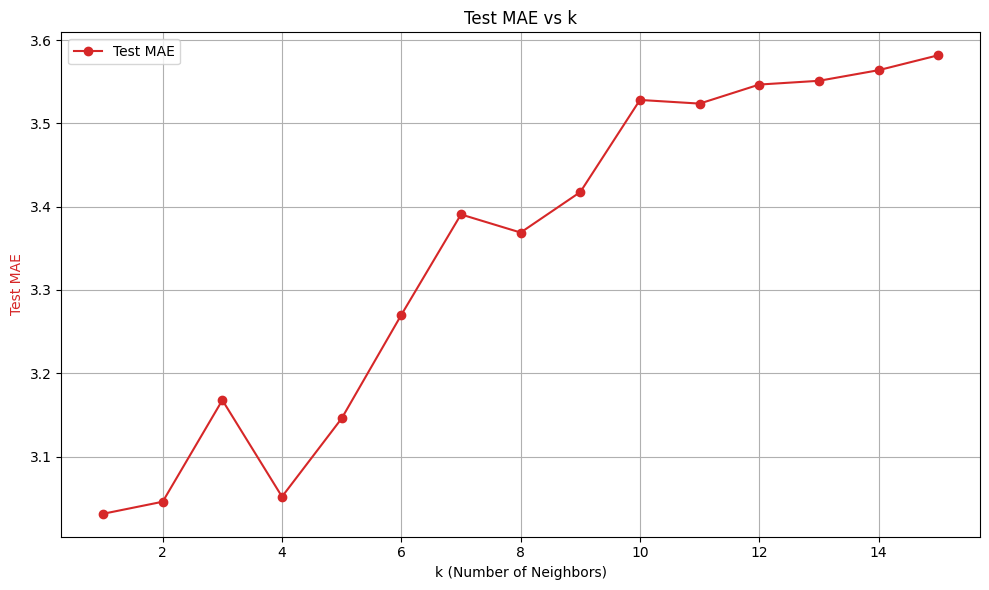

In [343]:
# Learn and graph for different k values

# Load the data
data, meta = arff.loadarff("housing.arff")
df = pd.DataFrame(data)

# Drop the inappropriate feature
df.drop("B", axis=1)

# Separate features from targets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)

# Create a list to store the graphable point (k, testMAE)
points = []

for k in range(1,16):
    # Initialize the learner and fit it with the data
    clf = KNeighborsRegressor(n_neighbors=k, weights='distance')
    clf.fit(X_train, y_train)

    # Get error values
    yTrainPred = clf.predict(X_train)
    trainR2 = r2_score(y_train, yTrainPred)
    trainMAE = mean_absolute_error(y_train, yTrainPred)

    yTestPred = clf.predict(X_test)
    testR2 = r2_score(y_test, yTestPred)
    testMAE = mean_absolute_error(y_test, yTestPred)

    points.append((k, testMAE))

k_values = []
test_MAE = []

for point in points:
    k, mae = point
    k_values.append(k)
    test_MAE.append(mae)
    print(f"k={k}, testMAE={mae:.5f}")

# Graph MAE
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_MAE, color='tab:red', label='Test MAE', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Test MAE', color='tab:red')
plt.title('Test MAE vs k')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### Discussion
How did the k values affect your results for this dataset? How does that compare to your previous work in this lab?

Very similarly to what we did earlier, the higher k values generally correlate to increased accuracy. Like before, when we fit the data and store the values, there seems to be a sweet spot where a higher k value becomes detrimental to the dataset.

## 4. (20%) KNN with nominal and real data

- Use the [lymph dataset](https://axon.cs.byu.edu/data/uci_class/lymph.arff)
- Use a 80/20 split of the data for the training/test set
- This dataset has both continuous and nominal attributes 
- Implement a distance metric which uses Euclidean distance for continuous features and 0/1 distance for nominal. Hints:
    - Write your own distance function (e.g. mydist) and use clf = KNeighborsClassifier(metric=mydist)
    - Change the nominal features in the data set to integer values since KNeighborsClassifier expects numeric features. I used Label_Encoder on the nominal features.
    - Keep a list of which features are nominal which mydist can use to decide which distance measure to use
    - There was an occasional bug in SK version 1.3.0 ("Flags object has no attribute 'c_contiguous'") that went away when I upgraded to the lastest SK version 1.3.1 
- Use your own choice for k and other parameters

In [383]:
# Train/Predict lymph with your own distance metric

# mydist
def mydist(x, y):
    # List of column indices for categorical features
    categorical_indices = [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16]  # adjust based on your dataset
    
    # Initialize distance
    dist = 0.0

    # Loop over all the features
    for i in range(len(x)):
        if i in categorical_indices:  # Categorical feature
            dist += (x[i] != y[i])  # 0/1 distance
        else:  # Continuous feature
            dist += (x[i] - y[i]) ** 2  # Euclidean distance
    
    return np.sqrt(dist)

# Load the data
data, meta = arff.loadarff("lymph.arff")
df = pd.DataFrame(data)

# Encode the featueres as well as the target variable.
encoder = LabelEncoder()
scaler = MinMaxScaler()

# Separate features from targets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

for col in X.columns:
    X[col] = encoder.fit_transform(X[col])
    X[col] = scaler.fit_transform(X[[col]])

y = encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define custom distance function

# Initialize the learner with the custom distance metric
clf = KNeighborsClassifier(n_neighbors=3, metric=mydist, weights='distance')
clf.fit(X_train, y_train)

# Get the training accuracy
yTrainPred = clf.predict(X_train)
trainAcc = accuracy_score(y_train, yTrainPred)
print(f"Training Accuracy: {trainAcc:.3f}")

# Get the testing accuracy
yTestPred = clf.predict(X_test)
testAcc = accuracy_score(y_test, yTestPred)
print(f"Testing Accuracy: {testAcc:.3f}")

Training Accuracy: 1.000
Testing Accuracy: 0.800


#### Discussion
Explain your distance metric and discuss your results

** Your discussion goes here **

## 5. (Optional 15% extra credit) Code up your own KNN Learner 
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below
- Use Euclidean distance to decide closest neighbors
- Implement both the classification and regression versions
- Include optional distance weighting for both algorithms
- Run your algorithm on the magic telescope and housing data sets above and discuss and compare your results 

*Discussion*

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KNNClassifier(BaseEstimator,ClassifierMixin):
    def __init__(self, columntype=[], weight_type='inverse_distance'): ## add parameters here
        """
        Args:
            columntype for each column tells you if continues[real] or if nominal[categoritcal].
            weight_type: inverse_distance voting or if non distance weighting. Options = ["no_weight","inverse_distance"]
        """
        self.columntype = columntype #Note This won't be needed until part 5
        self.weight_type = weight_type

    def fit(self, data, labels):
        """ Fit the data; run the algorithm (for this lab really just saves the data :D)
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self
    
    def predict(self, data):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    #Returns the Mean score given input data and labels
    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        return 0